In [86]:

import pandas as pd

#graphing setup
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
import countrycodes

In [98]:
print countries[0]
contcode={}
for i in range(len(countries)):
    contcode[countries[i]['name']] = countries[i]['continent']
print contcode

{'capital': 'Andorra la Vella', 'timezones': ['Europe/Andorra'], 'code': 'AD', 'continent': 'Europe', 'name': 'Andorra'}
{'Canada': 'North America', 'East Timor': 'Asia', 'Turkmenistan': 'Asia', 'Lithuania': 'Europe', 'Cambodia': 'Asia', 'Saint Kitts and Nevis': 'North America', 'Ethiopia': 'Africa', 'The Gambia': 'Africa', 'Sri Lanka': 'Asia', 'Swaziland': 'Africa', 'Argentina': 'South America', 'Bolivia': 'South America', 'Cameroon': 'Africa', 'Burkina Faso': 'Africa', 'Ghana': 'Africa', 'Saudi Arabia': 'Asia', 'Laos': 'Asia', 'Republic of Ireland': 'Europe', 'Slovenia': 'Europe', 'Guatemala': 'North America', 'Bosnia and Herzegovina': 'Europe', 'Kuwait': 'Asia', 'Jordan': 'Asia', 'Dominica': 'North America', 'Liberia': 'Africa', 'Maldives': 'Asia', 'Pakistan': 'Asia', 'Oman': 'Asia', 'Tanzania': 'Africa', 'S\xc3\xa3o Tom\xc3\xa9 and Pr\xc3\xadncipe': 'Africa', "People's Republic of China": 'Asia', 'Gabon': 'Africa', 'Monaco': 'Europe', 'New Zealand': 'Oceania', 'Yemen': 'Asia', 'Jam

In [140]:
worlddata=pd.read_csv(r'C:\Users\schro\Desktop\Projects\DataAnalysisND\P6-Visualization\hnp_stats_csv\HNP_Data.csv')
#final two rows are av and st dev

data_col=worlddata.columns.tolist()
#health_data=pd.DataFrame(columns=data_col)
colofinterest=['Health expenditure per capita (current US$)','Health expenditure per capita, PPP',
               'Health expenditure, private (% of GDP)','Health expenditure, public (% of GDP)',
               'Health expenditure, total (% of GDP)']

weightcol=['Prevalence of overweight (% of adults)','Prevalence of overweight (% of children under 5)']

years_interest=['﻿"Country Name"','1995', '1996','1997','1998','1999','2000','2001',
                '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014']

countries_interest=[]
def pull_data(variable):
    
    health_data1=worlddata.loc[worlddata['Indicator Name'] == variable][['﻿"Country Name"','2014']]
    health_data=health_data1.set_index('﻿"Country Name"', drop=False, append=False, inplace=False, verify_integrity=False)
    health_data=health_data.loc['Afghanistan':]
    return health_data


def print_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.set_option('display.max_columns', len(x))
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    
#print_full(health_data)

health_data=pull_data('Health expenditure per capita, PPP')
life_expectancy=pull_data('Life expectancy at birth, total (years)')

#add life expectancy column to health data to create scatter.
health_data['Life Expectancy (years)']=life_expectancy['2014']

#add life expectancy column to health data to create scatter.
health_data['Continent']=health_data['﻿"Country Name"'].map(contcode)

#drop any rows with NaN values
health_data=health_data.dropna() 


print health_data.head()
print_full(health_data)
#print(worlddata.iloc[467:476]['Indicator Name'])

print(worlddata.iloc[800:850]['Indicator Name'])

                         ﻿"Country Name"         2014  \
﻿"Country Name"                                         
Afghanistan                  Afghanistan   166.516727   
Albania                          Albania   614.535946   
Algeria                          Algeria   932.100284   
Angola                            Angola   239.010233   
Antigua and Barbuda  Antigua and Barbuda  1208.075846   

                     Life Expectancy (years)      Continent  
﻿"Country Name"                                              
Afghanistan                        60.374463           Asia  
Albania                            77.830463         Europe  
Algeria                            74.808098         Africa  
Angola                             52.266878         Africa  
Antigua and Barbuda                75.937634  North America  
                                   ﻿"Country Name"         2014  \
﻿"Country Name"                                                   
Afghanistan                     

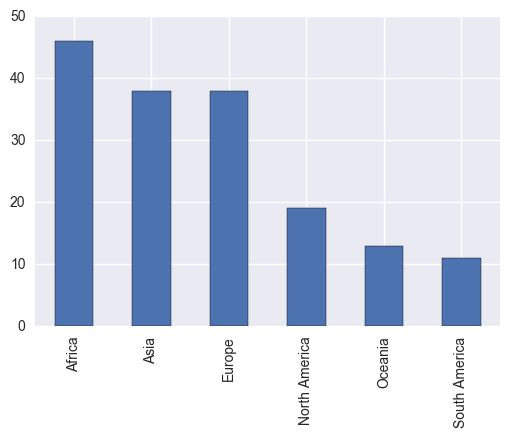

In [111]:

health_data['Continent'].value_counts().plot(kind='bar')


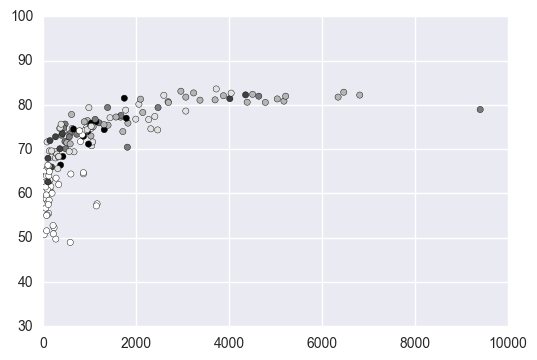

In [141]:
colordic_real={'Africa':'red','Asia':'orange','Europe':'green','North America':'blue','Oceania':'purple','South America':'black','nan':'grey'}
colordic={'Africa':1,'Asia':2,'Europe':3,'North America':4,'Oceania':5,'South America':6,'nan':7}

plt.scatter(health_data['2014'],health_data['Life Expectancy (years)'],c=health_data['Continent'].map(colordic))
plt.xlim(0, 10000)
plt.ylim(30, 100)
#sns.swarmplot(x='2014', y='Life Expectancy (years)', data=health_data, hue='Continent', size=10)
plt.show()

In [142]:
import csv
health_data.to_csv(path_or_buf=r'C:\Users\schro\Desktop\Projects\DataAnalysisND\P6-Visualization\health\healthdata.csv', float_format=None, columns=None,
                 header=['country','expense','life','continent'], index=False, index_label=False, mode='w')

